##ASSIGNMENT 4
#PART - A

In [17]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import cv2

#https://images.app.goo.gl/s4mwKkXPq6h1KKay8
#https://images.app.goo.gl/v17EFAyjC84FqmAG8

#Download the images from the above links and then apply the convolution filters(manually)
#a) apply prewitt filter
#b) apply sobel filter
#then output the resulting image

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
img1=cv2.imread('/content/drive/MyDrive/GettyImages-185743593-2000-507c6c8883a44851885ea4fbc10a2c9e.png')
img2=cv2.imread('/content/drive/MyDrive/shouts-animals-watch-baby-hemingway.png')

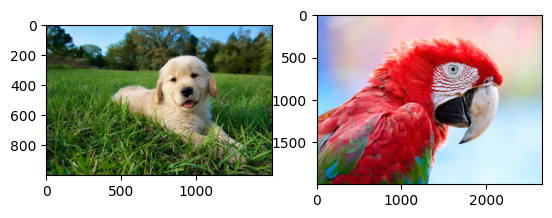

In [20]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

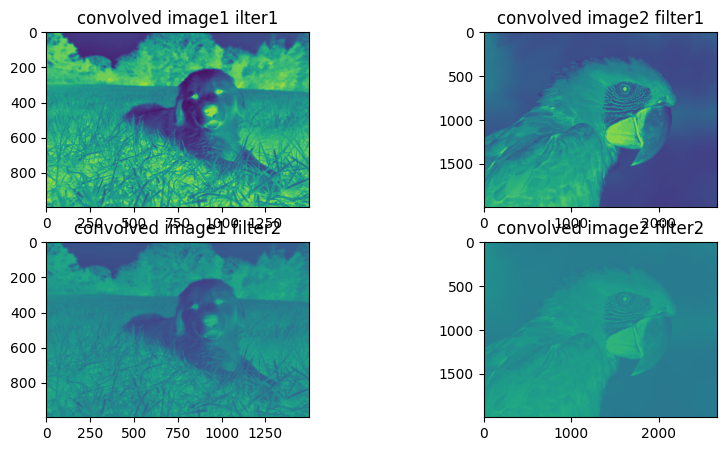

In [21]:
import cv2
import numpy as np

def convolve(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    output = np.zeros((img_height, img_width))

    for y in range(img_height):
        for x in range(img_width):
            region = padded_img[y: y + kernel_height, x: x + kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

img1 = cv2.imread('/content/drive/MyDrive/GettyImages-185743593-2000-507c6c8883a44851885ea4fbc10a2c9e.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/drive/MyDrive/shouts-animals-watch-baby-hemingway.png', cv2.IMREAD_GRAYSCALE)

kernel1 = np.array([
    [0, -1, 0],
    [-1, 2, -1],
    [0, -1, 0]
])

kernel2 = np.array([
    [0, -1, 0],
    [-1, 3, -1],
    [0, -1, 0]
])

convolved_image1_filter1 = convolve(img1, kernel1)
convolved_image2_filter1 = convolve(img2, kernel1)

convolved_image1_filter2 = convolve(img1, kernel2)
convolved_image2_filter2 = convolve(img2, kernel2)

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(convolved_image1_filter1)
plt.title('convolved image1 ilter1')

plt.subplot(2, 2, 2)
plt.imshow(convolved_image2_filter1)
plt.title('convolved image2 filter1')

plt.subplot(2, 2, 3)
plt.imshow(convolved_image1_filter2)
plt.title('convolved image1 filter2')

plt.subplot(2, 2, 4)
plt.imshow(convolved_image2_filter2)
plt.title('convolved image2 filter2')

plt.show()

Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)



### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image:


In [22]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [23]:
#Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K.

def corr2d(X, K):
    X_height, X_width = X.shape
    K = K.reshape((1, -1))
    K_height, K_width = K.shape
    X_padded = np.pad(X, ((K_height - 1) // 2, (K_width - 1) // 2), 'constant')
    Y = np.zeros((X_height, X_width - K_width + 1))
    for i in range(X_height):
        for j in range(X_width - K_width + 1):
            Y[i, j] = np.sum(X_padded[i:i + K_height, j:j + K_width] * K)
    return Y

In [24]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K)
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [25]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [26]:
def corr2d(X: np.array, K: np.array) -> np.array:
   return Y

In [27]:
#use the above corr2d in model

class model:
    def __init__(self,lr,epochs):
      #Write your code here
      self.lr = lr
      self.epochs = epochs
      self.model = tf.keras.Sequential()
      self.model.add(tf.keras.layers.Conv2D(1, (1, 2), input_shape=(1, 6, 8)))
      self.model.add(tf.keras.layers.ZeroPadding2D(((0, 0), (0, 1))))
      self.model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.lr))
    def fit(self,X,Y):
      #Write your code here
      for i in range(self.epochs):
            self.model.fit(X, Y, epochs=1)
            print(f"Epoch {i + 1}/{self.epochs}:")
            print(f"Kernel: {self.model.layers[0].weights[0].numpy()}")

In [28]:
gd = model(3e-2,100)
gd.fit(X,Y)

1/1 [==============================] - 1s 646ms/step - loss: 1.6589
Epoch 1/100:
Kernel: [[[[-0.18058774]
   [-0.37337005]
   [ 0.32139063]
   [-0.48414496]
   [-0.20075011]
   [-0.5269953 ]
   [-0.21491694]
   [-0.4040244 ]]

  [[ 0.30771652]
   [-0.31958678]
   [ 0.49171722]
   [ 0.34614855]
   [-0.36218587]
   [ 0.5015533 ]
   [ 0.28598496]
   [-0.14489096]]]]
1/1 [==============================] - 0s 6ms/step - loss: 1.1420
Epoch 2/100:
Kernel: [[[[-0.15097572]
   [-0.34375802]
   [ 0.32139063]
   [-0.48414496]
   [-0.20075011]
   [-0.5269953 ]
   [-0.18530492]
   [-0.37441236]]

  [[ 0.33732855]
   [-0.28997475]
   [ 0.49171722]
   [ 0.34614855]
   [-0.36218587]
   [ 0.5015533 ]
   [ 0.315597  ]
   [-0.11527894]]]]
1/1 [==============================] - 0s 8ms/step - loss: 0.7509
Epoch 3/100:
Kernel: [[[[-0.12218961]
   [-0.31497192]
   [ 0.32139063]
   [-0.48414496]
   [-0.20075011]
   [-0.5269953 ]
   [-0.15651882]
   [-0.34562626]]

  [[ 0.36611465]
   [-0.26118866]
   [ 0.4917

In [29]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image,
    as illustrated in Figure 1.

    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """

    # YOUR CODE STARTS HERE

    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant')

    # YOUR CODE ENDS HERE

    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


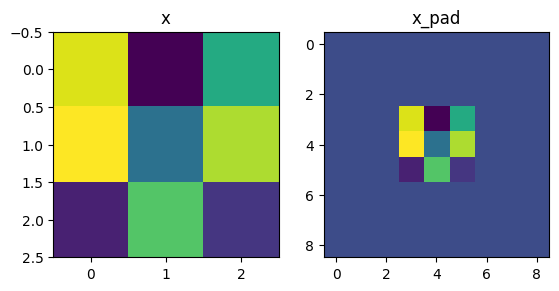

In [30]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [31]:

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
    of the previous layer.

    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    Z = np.float64(np.sum(np.multiply(a_slice_prev, W)) + b)

    # YOUR CODE ENDS HERE

    return Z

In [32]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

assert (type(Z) == np.float64), "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221


<ipython-input-31-f3c7cf3f9448>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = np.float64(np.sum(np.multiply(a_slice_prev, W)) + b)



### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

### Exercise 3 -  conv_forward
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs);
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias.

You also have access to the hyperparameters dictionary, which contains the stride and the padding.

In [ ]:
a_slice_prev.shape

(4, 4, 3)

In [40]:

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    """
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    n_H = int((n_H_prev + 2 * pad - f) / stride) + 1
    n_W = int((n_W_prev + 2 * pad - f) / stride) + 1
    Z = np.zeros((m, n_H, n_W, n_C))
    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(n_W):
                horiz_start = w * stride
                horiz_end = horiz_start + f
                for c in range(n_C):
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    weights = W[:, :, :, c]
                    biases = b[:, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
    cache = (A_prev, W, b, hparameters)

    # YOUR CODE ENDS HERE

    return Z, cache

In [41]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)



Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


<ipython-input-31-f3c7cf3f9448>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = np.float64(np.sum(np.multiply(a_slice_prev, W)) + b)



## 4 - Pooling Layer

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over.

<a name='4-1'></a>
### 4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.

<a name='ex-4'></a>
### Exercise 4 - pool_forward

Implement the forward pass of the pooling layer. Follow the hints in the comments below.





In [42]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    """

    # Retrieve dimensions from the input shape

    # Retrieve hyperparameters from "hparameters"

    # Define the dimensions of the output

    # Initialize output matrix A

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    f = hparameters["f"]
    stride = hparameters["stride"]
    n_H = int((n_H_prev - f) / stride) + 1
    n_W = int((n_W_prev - f) / stride) + 1
    n_C = n_C_prev
    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):
        for h in range(n_H):
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(n_W):
                horiz_start = w * stride
                horiz_end = horiz_start + f

                for c in range(n_C):
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

    # YOUR CODE ENDS HERE

    return A

In [44]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A= pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [45]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A= pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**Expected output**
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
  ```